<a href="https://colab.research.google.com/github/profliuhao/CSIT599/blob/main/CSIT599_Module4_Intro_to_NLP_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Simple RNN vs LSTM for Sentiment Analysis on IMDB Reviews


Instructions for Students:

Fill in the blanks marked with "# TODO: Student fills this" to complete the code.

You will need to specify:
1. The number of units in RNN/LSTM layers
2. The activation function for the output layer
3. The loss function
4. The optimizer
5. Key training parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time

# Set random seeds for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [2]:
# ============================================================================
# STEP 1: LOAD AND PREPROCESS DATA
# ============================================================================

print("\n" + "="*70)
print("STEP 1: Loading IMDB Dataset")
print("="*70)

# Load the IMDB dataset
# We'll use only the top 10,000 most frequent words
max_features = 10000  # Vocabulary size

# TODO: Student fills this - How many words to consider per review?
# Hint: Reviews will be truncated or padded to this length
maxlen = ___________  # Try values like 200, 300, or 500

print(f"Loading IMDB dataset with vocabulary size: {max_features}")
print(f"Maximum sequence length: {maxlen}")

# Load data: x_train and x_test are lists of word indices
# y_train and y_test are binary labels (0 = negative, 1 = positive)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(f"\nTraining samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")
print(f"Example review length before padding: {len(x_train[0])}")
print(f"Example label: {y_train[0]} (1 = positive, 0 = negative)")

# Pad sequences to ensure uniform input size
# Sequences shorter than maxlen will be padded with zeros
# Sequences longer than maxlen will be truncated
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(f"Shape of training data after padding: {x_train.shape}")
print(f"Shape of test data after padding: {x_test.shape}")


STEP 1: Loading IMDB Dataset
Loading IMDB dataset with vocabulary size: 10000
Maximum sequence length: 500

Training samples: 25000
Test samples: 25000
Example review length before padding: 218
Example label: 1 (1 = positive, 0 = negative)
Shape of training data after padding: (25000, 500)
Shape of test data after padding: (25000, 500)


In [3]:
# ============================================================================
# STEP 2: BUILD SIMPLE RNN MODEL
# ============================================================================

print("\n" + "="*70)
print("STEP 2: Building Simple RNN Model")
print("="*70)

def build_simple_rnn_model():
    """
    Build a Simple RNN model for sentiment classification.

    Architecture:
    1. Embedding layer: Converts word indices to dense vectors
    2. SimpleRNN layer: Processes sequences
    3. Dropout layer: Prevents overfitting
    4. Dense output layer: Binary classification
    """
    model = Sequential([
        Input(shape=(maxlen,)),
        # Embedding layer: maps word indices to dense vectors of size 128
        # Input: (batch_size, maxlen) - sequences of word indices
        # Output: (batch_size, maxlen, 128) - sequences of word embeddings
        Embedding(input_dim=max_features, output_dim=128),

        # TODO: Student fills this - Add SimpleRNN layer
        # Hint: Use SimpleRNN with appropriate number of units (try 64 or 128)
        # Set return_sequences=False since we only need the final output
        SimpleRNN(units=___________, return_sequences=False),

        # Dropout layer to prevent overfitting
        Dropout(0.5),

        # TODO: Student fills this - Add Dense output layer
        # Hint: Binary classification needs 1 unit
        # What activation function should we use for binary classification?
        Dense(1, activation='___________')
    ])

    return model

# Create the Simple RNN model
rnn_model = build_simple_rnn_model()

# Display model architecture
print("\nSimple RNN Model Architecture:")
rnn_model.summary()


STEP 2: Building Simple RNN Model

Simple RNN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# ============================================================================
# STEP 3: BUILD LSTM MODEL
# ============================================================================

print("\n" + "="*70)
print("STEP 3: Building LSTM Model")
print("="*70)

def build_lstm_model():
    """
    Build an LSTM model for sentiment classification.

    Architecture:
    1. Embedding layer: Converts word indices to dense vectors
    2. LSTM layer: Processes sequences with memory cells
    3. Dropout layer: Prevents overfitting
    4. Dense output layer: Binary classification

    LSTM advantages over Simple RNN:
    - Better at learning long-term dependencies
    - Mitigates vanishing gradient problem
    - Uses gates (input, forget, output) to control information flow
    """
    model = Sequential([
        Input(shape=(maxlen,)),
        # Embedding layer (same as Simple RNN)
        Embedding(input_dim=max_features, output_dim=128),

        # TODO: Student fills this - Add LSTM layer
        # Hint: Use LSTM with same number of units as SimpleRNN
        # Set return_sequences=False for sequence classification
        LSTM(units=___________, return_sequences=False),

        # Dropout layer
        Dropout(0.5),

        # TODO: Student fills this - Add Dense output layer
        # Should be identical to the RNN model
        Dense(1, activation='___________')
    ])

    return model

# Create the LSTM model
lstm_model = build_lstm_model()

# Display model architecture
print("\nLSTM Model Architecture:")
lstm_model.summary()


STEP 3: Building LSTM Model

LSTM Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# ============================================================================
# STEP 4: COMPILE MODELS
# ============================================================================

print("\n" + "="*70)
print("STEP 4: Compiling Models")
print("="*70)

# TODO: Student fills these - Specify loss function and optimizer
# Hints:
# - For binary classification, use 'binary_crossentropy' loss
# - Popular optimizers: 'adam', 'rmsprop', 'sgd'

loss_function = '___________'
optimizer = '___________'

print(f"Loss function: {loss_function}")
print(f"Optimizer: {optimizer}")

# Compile both models with the same configuration
rnn_model.compile(
    loss=loss_function,
    optimizer=optimizer,
    metrics=['accuracy']
)

lstm_model.compile(
    loss=loss_function,
    optimizer=optimizer,
    metrics=['accuracy']
)

print("✓ Models compiled successfully")


STEP 4: Compiling Models
Loss function: binary_crossentropy
Optimizer: rmsprop
✓ Models compiled successfully


In [6]:
# ============================================================================
# STEP 5: TRAIN MODELS
# ============================================================================

print("\n" + "="*70)
print("STEP 5: Training Models")
print("="*70)

# TODO: Student fills these - Set training hyperparameters
# Hints:
# - batch_size: typically 32, 64, or 128
# - epochs: typically 5-15 for this dataset
# - validation_split: typically 0.2 (20% of training data)

batch_size = ___________
epochs = ___________
validation_split = ___________

print(f"Batch size: {batch_size}")
print(f"Epochs: {epochs}")
print(f"Validation split: {validation_split}")

# Early stopping to prevent overfitting
# Stops training if validation loss doesn't improve for 'patience' epochs
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train Simple RNN Model
print("\n" + "-"*70)
print("Training Simple RNN Model...")
print("-"*70)

start_time = time.time()
rnn_history = rnn_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[early_stop],
    verbose=1
)
rnn_training_time = time.time() - start_time

print(f"\n✓ Simple RNN training completed in {rnn_training_time:.2f} seconds")

# Train LSTM Model
print("\n" + "-"*70)
print("Training LSTM Model...")
print("-"*70)

start_time = time.time()
lstm_history = lstm_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[early_stop],
    verbose=1
)
lstm_training_time = time.time() - start_time

print(f"\n✓ LSTM training completed in {lstm_training_time:.2f} seconds")


STEP 5: Training Models
Batch size: 64
Epochs: 10
Validation split: 0.1

----------------------------------------------------------------------
Training Simple RNN Model...
----------------------------------------------------------------------
Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 59s 149ms/step - accuracy: 0.5085 - loss: 0.7375 - val_accuracy: 0.7336 - val_loss: 0.5436
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 45s 128ms/step - accuracy: 0.7221 - loss: 0.5589 - val_accuracy: 0.7352 - val_loss: 0.5349
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.7772 - loss: 0.4897 - val_accuracy: 0.7580 - val_loss: 0.4981
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.8142 - loss: 0.4286 - val_accuracy: 0.5604 - val_loss: 0.8975
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 32s 91ms/step - accuracy: 0.6502 - loss: 0.6328 - val_accuracy: 0.7776 - val_loss: 0.4685
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.8040 - loss: 0.4490 - val_accuracy:

In [7]:
# ============================================================================
# STEP 6: EVALUATE MODELS
# ============================================================================

print("\n" + "="*70)
print("STEP 6: Evaluating Models on Test Set")
print("="*70)

# Evaluate Simple RNN
rnn_loss, rnn_accuracy = rnn_model.evaluate(x_test, y_test, verbose=0)
print(f"\nSimple RNN Test Results:")
print(f"  Loss: {rnn_loss:.4f}")
print(f"  Accuracy: {rnn_accuracy:.4f} ({rnn_accuracy*100:.2f}%)")
print(f"  Training time: {rnn_training_time:.2f} seconds")

# Evaluate LSTM
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test, verbose=0)
print(f"\nLSTM Test Results:")
print(f"  Loss: {lstm_loss:.4f}")
print(f"  Accuracy: {lstm_accuracy:.4f} ({lstm_accuracy*100:.2f}%)")
print(f"  Training time: {lstm_training_time:.2f} seconds")


STEP 6: Evaluating Models on Test Set

Simple RNN Test Results:
  Loss: 0.4413
  Accuracy: 0.8017 (80.17%)
  Training time: 221.56 seconds

LSTM Test Results:
  Loss: 0.3238
  Accuracy: 0.8748 (87.48%)
  Training time: 67.78 seconds



STEP 7: Visualizing Training History

✓ Visualization saved as 'rnn_lstm_comparison.png'


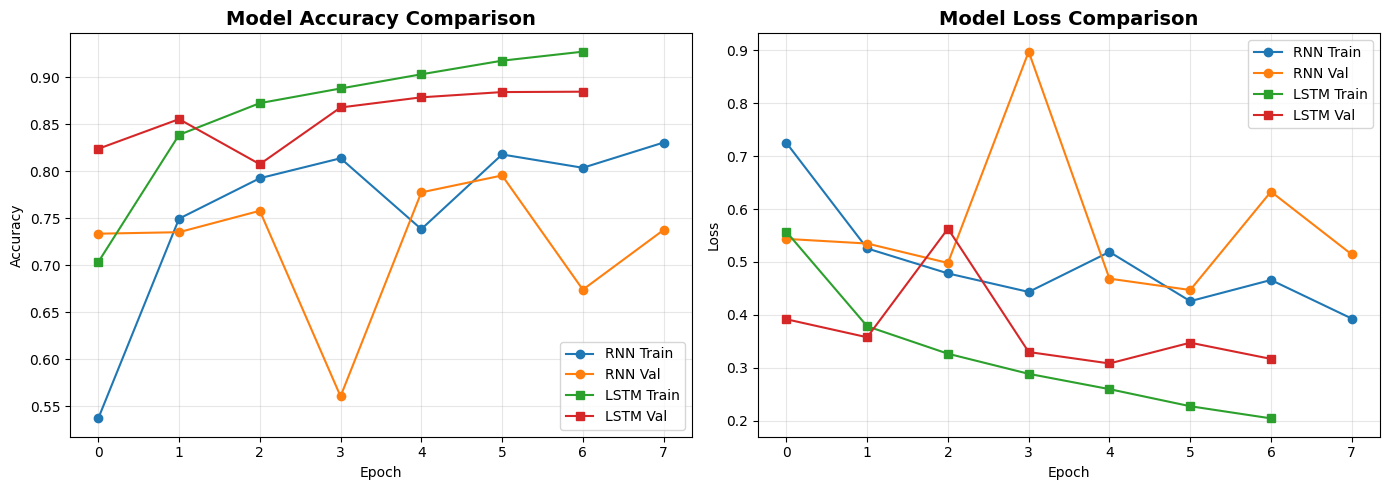

In [8]:
# ============================================================================
# STEP 7: VISUALIZE RESULTS
# ============================================================================

print("\n" + "="*70)
print("STEP 7: Visualizing Training History")
print("="*70)

# Create comparison plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Training and Validation Accuracy
axes[0].plot(rnn_history.history['accuracy'], label='RNN Train', marker='o')
axes[0].plot(rnn_history.history['val_accuracy'], label='RNN Val', marker='o')
axes[0].plot(lstm_history.history['accuracy'], label='LSTM Train', marker='s')
axes[0].plot(lstm_history.history['val_accuracy'], label='LSTM Val', marker='s')
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Training and Validation Loss
axes[1].plot(rnn_history.history['loss'], label='RNN Train', marker='o')
axes[1].plot(rnn_history.history['val_loss'], label='RNN Val', marker='o')
axes[1].plot(lstm_history.history['loss'], label='LSTM Train', marker='s')
axes[1].plot(lstm_history.history['val_loss'], label='LSTM Val', marker='s')
axes[1].set_title('Model Loss Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('rnn_lstm_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as 'rnn_lstm_comparison.png'")
plt.show()

In [9]:
# ============================================================================
# STEP 8: SUMMARY AND COMPARISON
# ============================================================================

print("\n" + "="*70)
print("STEP 8: Final Comparison Summary")
print("="*70)

print("\n" + "-"*70)
print("PERFORMANCE COMPARISON")
print("-"*70)
print(f"{'Metric':<20} {'Simple RNN':<15} {'LSTM':<15} {'Winner':<15}")
print("-"*70)
print(f"{'Test Accuracy':<20} {rnn_accuracy:.4f}{'':<10} {lstm_accuracy:.4f}{'':<10} {'LSTM' if lstm_accuracy > rnn_accuracy else 'RNN':<15}")
print(f"{'Test Loss':<20} {rnn_loss:.4f}{'':<10} {lstm_loss:.4f}{'':<10} {'LSTM' if lstm_loss < rnn_loss else 'RNN':<15}")
print(f"{'Training Time (s)':<20} {rnn_training_time:.2f}{'':<10} {lstm_training_time:.2f}{'':<10} {'RNN' if rnn_training_time < lstm_training_time else 'LSTM':<15}")
print("-"*70)

# Calculate improvement
accuracy_improvement = ((lstm_accuracy - rnn_accuracy) / rnn_accuracy) * 100
print(f"\nLSTM accuracy improvement over RNN: {accuracy_improvement:+.2f}%")




STEP 8: Final Comparison Summary

----------------------------------------------------------------------
PERFORMANCE COMPARISON
----------------------------------------------------------------------
Metric               Simple RNN      LSTM            Winner         
----------------------------------------------------------------------
Test Accuracy        0.8017           0.8748           LSTM           
Test Loss            0.4413           0.3238           LSTM           
Training Time (s)    221.56           67.78           LSTM           
----------------------------------------------------------------------

LSTM accuracy improvement over RNN: +9.11%


In [10]:
print("\n" + "="*70)
print("KEY TAKEAWAYS")
print("="*70)
print("""
1. LSTM ADVANTAGES:
   - Better at capturing long-term dependencies in sequences
   - More resistant to vanishing gradient problem
   - Uses gating mechanisms (input, forget, output gates)
   - Generally achieves higher accuracy on sequence tasks

2. SIMPLE RNN LIMITATIONS:
   - Struggles with long sequences due to vanishing gradients
   - Limited memory of past information
   - Simpler architecture, fewer parameters

3. TRADE-OFFS:
   - LSTM: Higher accuracy but slower training and more parameters
   - Simple RNN: Faster training but lower performance on complex tasks

4. WHEN TO USE EACH:
   - Use LSTM when: Long-term dependencies matter, accuracy is critical
   - Use Simple RNN when: Sequences are short, speed is critical, or as baseline
""")

print("="*70)
print("Exercise completed! Review the results and discuss with your instructor.")
print("="*70)


KEY TAKEAWAYS

1. LSTM ADVANTAGES:
   - Better at capturing long-term dependencies in sequences
   - More resistant to vanishing gradient problem
   - Uses gating mechanisms (input, forget, output gates)
   - Generally achieves higher accuracy on sequence tasks

2. SIMPLE RNN LIMITATIONS:
   - Struggles with long sequences due to vanishing gradients
   - Limited memory of past information
   - Simpler architecture, fewer parameters

3. TRADE-OFFS:
   - LSTM: Higher accuracy but slower training and more parameters
   - Simple RNN: Faster training but lower performance on complex tasks

4. WHEN TO USE EACH:
   - Use LSTM when: Long-term dependencies matter, accuracy is critical
   - Use Simple RNN when: Sequences are short, speed is critical, or as baseline

Exercise completed! Review the results and discuss with your instructor.
